## Plot Training Loss History of Helmholtz Problem
We already saved the training loss history in the saved checkpoints.



In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
import os
import torch
import numpy as np
from matplotlib import pyplot as plt

In [38]:
PROJECT_ROOT = os.path.abspath(os.path.join(os.getcwd(), "../../../"))

if PROJECT_ROOT not in sys.path:
    sys.path.insert(0, PROJECT_ROOT)

from src.utils.logger import Logging
from src.utils.plot_loss import plot_loss_history
from src.utils.color import model_color
from src.poisson.cv_solver import CVPDESolver
from src.poisson.dv_solver import DVPDESolver
from src.poisson.classical_solver import Classical_Solver


In [ ]:
TEST_CHECKPOINT_PATH = os.path.join(PROJECT_ROOT, "testing_checkpoints/helmholtz")

logger = Logging(TEST_CHECKPOINT_PATH)
model_dirname = logger.get_output_dir()

In [39]:


dv_angle_circuit19 = "../../../checkpoints/helmholtz/2025-01-21_15-25-07-805635"
dv_angle_circuit5 = "../../../checkpoints/helmholtz/2025-01-21_15-02-22-049143"
dv_angle_alternate = "../../../checkpoints/helmholtz/2025-01-21_15-57-56-893468"

dv_amp_alternate = "../../../checkpoints/helmholtz/2025-01-31_16-22-23-041398"
dv_amp_circuit5 = "../../../checkpoints/helmholtz/2025-01-31_16-24-09-831849"
dv_amp_circuit19 = "../../../checkpoints/helmholtz/2025-01-31_16-23-43-289401"

cv1 = "../../../checkpoints/helmholtz/2025-01-31_19-43-22-617030"
classical= "../../../checkpoints/helmholtz/2025-01-25_16-55-21-506277"

MODEL_PATH_LIST = {
    dv_angle_circuit19: "dv",
    dv_angle_circuit5: "dv",
    dv_angle_alternate: "dv",
    dv_amp_alternate: "dv",
    dv_amp_circuit5: "dv",
    dv_amp_circuit19: "dv",
    cv1: "cv",
    classical: "classical",
}

MODEL_Type_LIST = {
    dv_angle_circuit19: "angle_circuit19",
    dv_angle_circuit5: "angle_circuit5",
    dv_angle_alternate: "angle_alternate",
    dv_amp_alternate: "amp_alternate",
    dv_amp_circuit5: "amp_circuit5",
    dv_amp_circuit19: "amp_circuit19",
    cv1: "cv",
    classical: "classical",
}


In [41]:


all_loss_history = {}

for  model_path,solver in MODEL_PATH_LIST.items():

    if solver == "cv":
        state = CVPDESolver.load_state(os.path.join(model_path, "model.pth"))
        model = CVPDESolver(state["args"], logger)

        model.preprocessor.load_state_dict(state["preprocessor"])
        model.quantum_layer.load_state_dict(state["quantum_layer"])
        model.postprocessor.load_state_dict(state["postprocessor"])

    elif solver == "classical":
        state = Classical_Solver.load_state(os.path.join(model_path, "model.pth"))
        model = Classical_Solver(state["args"], logger)

    else:
        state = DVPDESolver.load_state(os.path.join(model_path, "model.pth"))
        model = DVPDESolver(state["args"], logger)
        model.preprocessor.load_state_dict(state["preprocessor"])
        model.postprocessor.load_state_dict(state["postprocessor"])
        model.quantum_layer.load_state_dict(state["quantum_layer"])

    model.logger = logger
    # for key, value in model.args.items():
    #     model.logger.print(f"{key} : {value}")

    model.logger.print(f"Totoal number of iterations : , {len(state['loss_history'])}")
    model.logger.print(f"The final loss : , {state['loss_history'][-1]}")

    # Print total number of parameters
    total_params = sum(p.numel() for p in model.parameters())
    model.logger.print(f"Total number of parameters: {total_params}")

    all_loss_history[MODEL_Type_LIST[model_path]] = state["loss_history"]

INFO:src.utils.logger:checkpoint path: self.log_path='/home/afrah/ubuntu/afrah/code/QNN4PDEs/testing_checkpoints/cavity/2025-02-05_12-20-10-655581'
INFO:src.utils.logger:Totoal number of iterations : , 5900
INFO:src.utils.logger:The final loss : , 0.18612295389175415
INFO:src.utils.logger:Total number of parameters: 928
INFO:src.utils.logger:checkpoint path: self.log_path='/home/afrah/ubuntu/afrah/code/QNN4PDEs/testing_checkpoints/cavity/2025-02-05_12-20-10-655581'
INFO:src.utils.logger:Totoal number of iterations : , 4000
INFO:src.utils.logger:The final loss : , 0.14568492770195007
INFO:src.utils.logger:Total number of parameters: 988
INFO:src.utils.logger:checkpoint path: self.log_path='/home/afrah/ubuntu/afrah/code/QNN4PDEs/testing_checkpoints/cavity/2025-02-05_12-20-10-655581'
INFO:src.utils.logger:Totoal number of iterations : , 5500


INFO:src.utils.logger:The final loss : , 0.11265435814857483
INFO:src.utils.logger:Total number of parameters: 933
INFO:src.utils.logger:checkpoint path: self.log_path='/home/afrah/ubuntu/afrah/code/QNN4PDEs/testing_checkpoints/cavity/2025-02-05_12-20-10-655581'
INFO:src.utils.logger:Totoal number of iterations : , 3950
INFO:src.utils.logger:The final loss : , 0.17713670432567596
INFO:src.utils.logger:Total number of parameters: 615
INFO:src.utils.logger:checkpoint path: self.log_path='/home/afrah/ubuntu/afrah/code/QNN4PDEs/testing_checkpoints/cavity/2025-02-05_12-20-10-655581'
INFO:src.utils.logger:Totoal number of iterations : , 1200
INFO:src.utils.logger:The final loss : , 0.11623364686965942
INFO:src.utils.logger:Total number of parameters: 988
INFO:src.utils.logger:checkpoint path: self.log_path='/home/afrah/ubuntu/afrah/code/QNN4PDEs/testing_checkpoints/cavity/2025-02-05_12-20-10-655581'
INFO:src.utils.logger:Totoal number of iterations : , 1950
INFO:src.utils.logger:The final lo

Model state loaded from ../../../checkpoints/cavity/2025-01-21_16-02-04-709172/model.pth
Model state loaded from ../../../checkpoints/cavity/2025-01-21_15-58-27-004581/model.pth
Model state loaded from ../../../checkpoints/cavity/2025-01-21_15-53-27-946694/model.pth
Model state loaded from ../../../checkpoints/cavity/2025-01-31_21-36-01-818020/model.pth
Model state loaded from ../../../checkpoints/cavity/2025-01-31_16-27-19-868931/model.pth
Model state loaded from ../../../checkpoints/cavity/2025-01-31_16-28-59-778131/model.pth
Model state loaded from ../../../checkpoints/cavity/2025-01-31_19-43-39-820449/model.pth
Model state loaded from ../../../checkpoints/cavity/2025-01-25_16-54-26-160510/model.pth


In [29]:
keys

dict_keys(['angle_circuit19', 'angle_circuit5', 'angle_alternate', 'amp_circuit19', 'amp_circuit5', 'vc'])

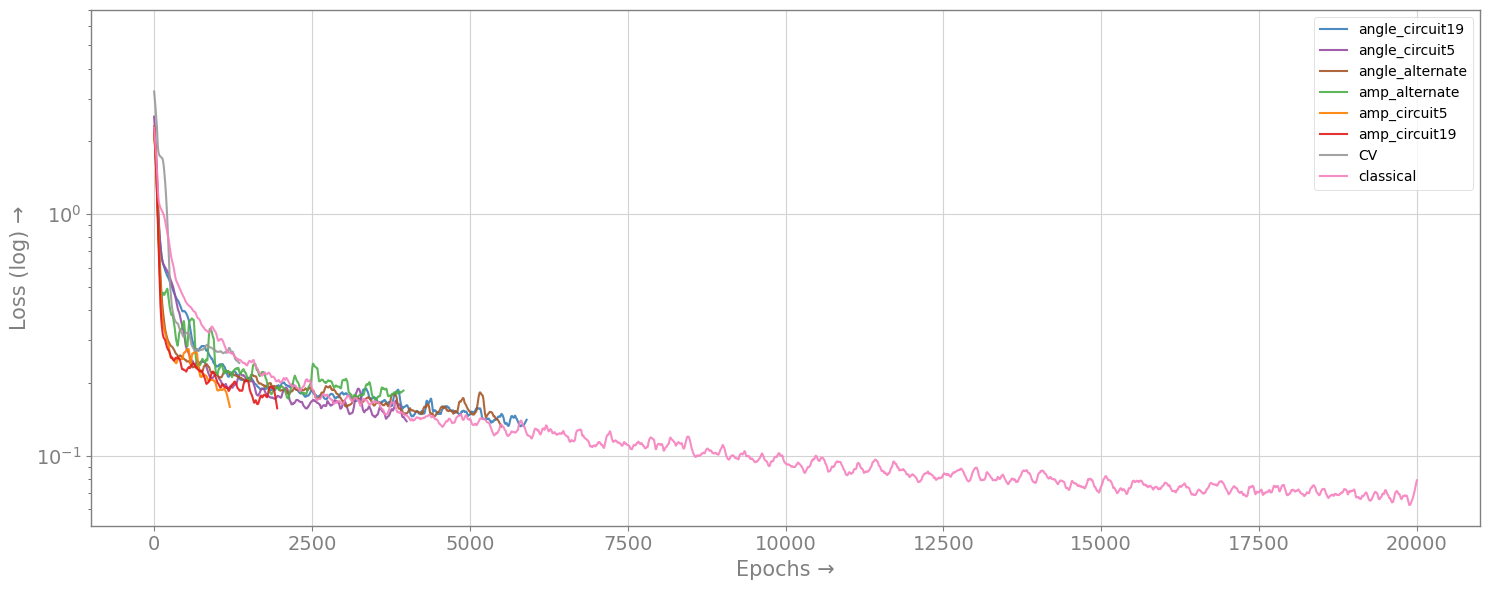

In [46]:
data_list = [
    {
        "data": all_loss_history["angle_circuit19"],
        "color": model_color["angle_circuit19"],
        "name": "angle_circuit19",
        "alpha": 0.9,
        "window": 100,
        "show_avg": False,
        "show_lower": False,
    },
    {
        "data": all_loss_history["angle_circuit5"],
        "color": model_color["angle_circuit5"],
        "name": "angle_circuit5",
        "alpha": 0.9,
        "window": 100,
        "show_avg": False,
        "show_lower": False,
    },
    {
        "data": all_loss_history["angle_alternate"],
        "color": model_color["angle_alternate"],
        "name": "angle_alternate",
        "alpha": 0.9,
        "window": 100,
        "show_avg": False,
        "show_lower": False,
    },
    {
        "data": all_loss_history["amp_alternate"],
        "color": model_color["amp_alternate"],
        "name": "amp_alternate",
        "alpha": 0.9,
        "window": 100,
        "show_avg": False,
        "show_lower": False,
    },
    {
        "data": all_loss_history["amp_circuit5"],
        "color": model_color["amp_circuit5"],
        "name": "amp_circuit5",
        "alpha": 0.9,
        "window": 100,
        "show_avg": False,
        "show_lower": False,
    },
    {
        "data": all_loss_history["amp_circuit19"],
        "color": model_color["amp_circuit19"],
        "name": "amp_circuit19",
        "alpha": 0.9,
        "window": 100,
        "show_avg": False,
        "show_lower": False,
    },
    {
        "data": all_loss_history["cv"],
        "color": model_color["cv"],
        "name": "CV",
        "alpha": 0.9,
        "window": 100,
        "show_avg": False,
        "show_lower": False,
    },
    {
        "data": all_loss_history["classical"],
        "color": model_color["classical"],
        "name": "classical",
        "alpha": 0.9,
        "window": 100,
        "show_avg": False,
        "show_lower": False,
    },
]


plot_loss_history(
    data_list,
    os.path.join(logger.get_output_dir(), "loss_history_cavity.png"),
    y_max=7,
)